# Tarea 2

- Cargue los datos de meteorite_landins.csv de la sesión 3
- Cree un nuevo dataframe llamado meteoritos_h4. En este dataframe, utilizando la función str. seleccione todos los meteoritos solamente de categoría H4
- Cree otro dataframe llamado meteoritos_h5. En este dataframe, utilizando la función str. seleccione todos los meteoritos de solamente categoría H5
- Limpie los datos de ambos dataframes, eliminando las entradas donde las masas sean cero, null, NaN, etc.
- Utilizando masks y selecciones, cuente cuántos meteoritos H4 cayeron entre 1960 y 1990.
- Utilizando masks y selecciones, cuente cuántos meteoritos H5 cayeron entre 1960 y 1990.
- Concatene ambos dataframes y grafique la cantidad de meteoritos por clase y por año

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
data=pd.read_csv('../Sesión 3/meteorite-landings.csv')

In [45]:
meteoritos_h4=data[data.recclass.str.contains('H4')]
meteoritos_h4=meteoritos_h4[meteoritos_h4!=0]
meteoritos_h4=meteoritos_h4[meteoritos_h4.notnull()]
meteoritos_h4=meteoritos_h4.dropna()

In [46]:
meteoritos_h5=data[data.recclass.str.contains('H5')]
meteoritos_h5=meteoritos_h5[meteoritos_h5!=0]
meteoritos_h5=meteoritos_h5[meteoritos_h5.notnull()]
meteoritos_h5=meteoritos_h5.dropna()

In [47]:
h4_6090=meteoritos_h4[(meteoritos_h4.year >= 1960) & (meteoritos_h4.year < 1990)]

In [48]:
h5_6090=meteoritos_h5[(meteoritos_h5.year >= 1960) & (meteoritos_h5.year < 1990)]

In [49]:
h4_6090.recclass.value_counts()

H4       2191
H4/5      270
H4-6        6
EH4         6
H4-5        4
H4/6        1
H4-an       1
Name: recclass, dtype: int64

In [53]:
maskh4=h4_6090['recclass'].str.contains('EH4')
h4_6090.loc[maskh4,"recclass"]=h4_6090.loc[maskh4,"recclass"].str.replace("EH4","H4")

C:\Users\Dell\anaconda3_64\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [54]:
h4_6090.recclass.value_counts()

H4       2197
H4/5      270
H4-6        6
H4-5        4
H4/6        1
H4-an       1
Name: recclass, dtype: int64

In [50]:
h5_6090.recclass.value_counts()

H5      2598
H5/6      16
H5-6      11
EH5        3
Name: recclass, dtype: int64

In [55]:
maskh5=h5_6090['recclass'].str.contains('EH5')
h5_6090.loc[maskh5,"recclass"]=h5_6090.loc[maskh5,"recclass"].str.replace("EH5","H5")

In [56]:
h5_6090.recclass.value_counts()

H5      2601
H5/6      16
H5-6      11
Name: recclass, dtype: int64

In [57]:
h4h5_6090=pd.concat([h4_6090,h5_6090])

In [58]:
h4h5_6090

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
193,Chela,5338,Valid,H4,2936.00,Fell,1988.0,-3.66667,32.50000,"(-3.666670, 32.500000)"
196,Chernyi Bor,5339,Valid,H4,6000.00,Fell,1964.0,53.70000,30.10000,"(53.700000, 30.100000)"
213,Conquista,5418,Valid,H4,20350.00,Fell,1965.0,-19.85000,-47.55000,"(-19.850000, -47.550000)"
266,Dwaleni,7755,Valid,H4-6,3230.00,Fell,1970.0,-27.20000,31.31667,"(-27.200000, 31.316670)"
356,Gursum,11465,Valid,H4/5,34650.00,Fell,1981.0,9.36667,42.41667,"(9.366670, 42.416670)"
...,...,...,...,...,...,...,...,...,...,...
43415,Yamato 86708,30214,Valid,H5,118.12,Found,1986.0,-71.50000,35.66667,"(-71.500000, 35.666670)"
43421,Yamato 86714,30220,Valid,H5,11.38,Found,1986.0,-71.50000,35.66667,"(-71.500000, 35.666670)"
43445,Yamato 86738,30244,Valid,H5,1.75,Found,1986.0,-71.50000,35.66667,"(-71.500000, 35.666670)"
43455,Yamato 86748,30254,Valid,H5,595.24,Found,1986.0,-71.50000,35.66667,"(-71.500000, 35.666670)"


<AxesSubplot:xlabel='year'>

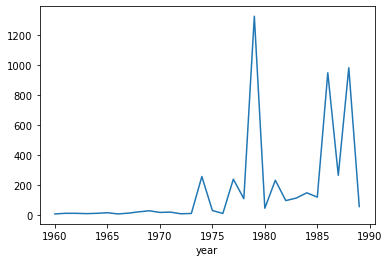

In [61]:
h4h5_6090.pivot_table("recclass",index="year",aggfunc="count").plot(legend=None)

<AxesSubplot:>

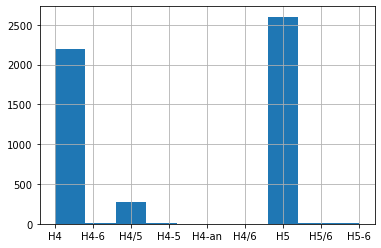

In [62]:
h4h5_6090.recclass.hist()